In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用來正常顯示中文標籤
plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號

In [3]:
path = './project2/'
file_list = ['A','B','E','F']
filename = '_lvr_land_A.csv'


In [4]:
a = pd.read_csv(path+str(file_list[0])+filename,encoding='utf-8')
b = pd.read_csv(path+str(file_list[1])+filename,encoding='utf-8')
e = pd.read_csv(path+str(file_list[2])+filename,encoding='utf-8')
f = pd.read_csv(path+str(file_list[3])+filename,encoding='utf-8')

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
a = a.iloc[1:,:].reset_index(drop=True)
b = b.iloc[1:,:].reset_index(drop=True)
e = e.iloc[1:,:].reset_index(drop=True)
f = f.iloc[1:,:].reset_index(drop=True)

In [6]:
df = pd.concat([a,b,e,f]).reset_index(drop=True)

In [7]:
df.describe()

,主建物面積,附屬建物面積,陽台面積
count,59476.000000,59476.000000,59476.000000
mean,79.128890,5.470561,3.220769
std,165.318619,10.075095,5.753949
min,0.000000,0.000000,0.000000
25%,32.847500,0.000000,0.000000
50%,69.360000,1.470000,0.000000
75%,96.432500,8.370000,5.230000
max,25959.340000,908.560000,176.690000


In [8]:
df.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)',
       '車位總價元', '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯'],
      dtype='object')

In [9]:
for i in df.columns:
    print(f"{i}'s unique values")
    print(df[i].unique(),'\n\n')

鄉鎮市區's unique values
['文山區' '中正區' '大同區' '萬華區' '中山區' '內湖區' '信義區' '松山區' '南港區' '北投區' '士林區' '大安區'
 '西區' '南區' '中區' '東區' '北屯區' '北區' '西屯區' '南屯區' '后里區' '豐原區' '神岡區' '外埔區' '大甲區'
 '沙鹿區' '清水區' '東勢區' '大雅區' '潭子區' '烏日區' '大里區' '霧峰區' '太平區' '龍井區' '大肚區' '新社區'
 '梧棲區' '石岡區' '和平區' '鼓山區' '鹽埕區' '前金區' '苓雅區' '新興區' '小港區' '前鎮區' '三民區' '左營區'
 '楠梓區' '梓官區' '岡山區' '燕巢區' '橋頭區' '鳳山區' '大樹區' '旗山區' '鳥松區' '仁武區' '路竹區' '阿蓮區'
 '湖內區' '美濃區' '桃源區' '大寮區' '林園區' '內門區' '茄萣區' '田寮區' '大社區' '永安區' '旗津區' '彌陀區'
 '那瑪夏區' '杉林區' '六龜區' '甲仙區' '板橋區' '新莊區' '林口區' '五股區' '泰山區' '新店區' '汐止區' '淡水區'
 '八里區' '貢寮區' '三重區' '蘆洲區' '永和區' '中和區' '三峽區' '樹林區' '鶯歌區' '土城區' '平溪區' '三芝區'
 '石門區' '金山區' '烏來區' '雙溪區' '深坑區' '瑞芳區' '萬里區' '石碇區' '坪林區'] 


交易標的's unique values
['房地(土地+建物)+車位' '房地(土地+建物)' '土地' '車位' '建物'] 


土地區段位置建物區段門牌's unique values
['臺北市文山區忠順街二段85巷1~30號' '臺北市文山區福興路91~120號' '臺北市文山區木柵路四段121~150號' ...
 '文化北路二段550巷29弄1~30號' '鳳鳴段31~60地號' '成福段成福小段331~360地號'] 


土地移轉總面積平方公尺's unique values
['26.97' '10.32' '39.64' ... 7.62 30.36 762.0] 


都市土地使用分區's unique values
['住' '其他

['有' '無'] 


總價元's unique values
['36000000' '5580000' '23800000' ... 16150000 26460000 8310000] 


單價元平方公尺's unique values
['156583' '149558' '181472' ... 61010.0 66606.0 59823.0] 


車位類別's unique values
['坡道平面' nan '升降機械' '塔式車位' '其他' '升降平面' '坡道機械' '一樓平面'] 


車位移轉總面積(平方公尺)'s unique values
['40.7' '0.0' '36.58' ... 42.96 60.62 24.14] 


車位總價元's unique values
['0' '1500000' '2300000' '1700000' '1200000' '2100000' '10000000'
 '1400000' '2000000' '4000000' '1800000' '1000000' '2500000' '6000000'
 '1300000' '2150000' '750000' '2700000' '3400000' '3600000' '18000000'
 '1750000' '5000000' '2650000' '2790000' '7000000' '2080000' '2750000'
 '15000000' '2715000' '352000' '4600000' '2400000' '2280000' '600000'
 '16000000' '4800000' '7600000' '1530000' '7400000' '2950000' '2050000'
 '8080000' '2600000' '14000000' '3000000' '390000' '11400000' '8000000'
 '2800000' '3100000' '450000' '4200000' '800000' '3700000' '14400000'
 '1680000' '3500000' '880000' '1150000' '1950000' '4900000' '7120000'
 '1850

In [10]:
df['備註'].value_counts()

含增建或未登記建物。;                        2752
預售屋、或土地及建物分次登記案件;                  2075
陽台外推;                              1684
其他增建;                              1515
親友、員工、共有人或其他特殊關係間之交易;              1453
                                   ... 
土地增值稅由買方負擔親友、員工、共有人或其他特殊關係間之交易;       1
不動產之共有人數為４人畸零地或有合併使用之交易。              1
不動產之共有人數為２人含設備款160萬元整                 1
整修過屋況佳.所有權人共2人                        1
土地價款:627萬元整房屋價款:513萬元整                1
Name: 備註, Length: 3541, dtype: int64

In [11]:
df['special_relationship_trade']= df['備註'].apply(lambda x:1 if str(x)=='親友、員工、共有人或其他特殊關係間之交易;' else 0)

In [12]:
taipei_list = ['中正區','大同區','中山區','松山區','大安區','萬華區','信義區','士林區','北投區','內湖區','文山區']
df['台北'] = df['鄉鎮市區'].apply(lambda x: 1 if x in taipei_list else 0)

In [13]:
df[['土地','建物']] = df['交易筆棟數'].str.split('建物', expand=True)
df['土地'] = df['土地'].apply(lambda x: int(x.split('土地')[-1]))
df['車位'] = df['建物'].apply(lambda x: int(x.split('車位')[-1]))
df['建物'] = df['建物'].apply(lambda x: int(x.split('車位')[0]))

In [14]:
df['elevator_移轉'] = df['移轉層次'].apply(lambda x: 1 if '電梯' in str(x)  else 0)
df['elevator_電梯'] = df['電梯'].apply(lambda x:1 if x=='有' else 0)
df['elevator_建築'] = df['建物型態'].apply(lambda x:1 if '有電梯' in str(x) else 0)
df['elevator'] = df['elevator_移轉'] +df['elevator_電梯']+df['elevator_建築'] 
df['elevator'] = df['elevator'] .apply(lambda x: 1 if x>0 else 0)

In [15]:
df['建築完成年月'] = df['建築完成年月'].fillna(0)
df['build_date'] = df['建築完成年月'].apply(lambda x: str(x).split('.')[0] if len(str(x))>=7 else str(0)+str(x))
df['build_date'] = df['build_date'].apply(lambda x:x[:3]+'-'+x[3:5]+'-'+x[5:] if len(x)==7 else None)

In [16]:
df['交易年月日'] = df['交易年月日'].fillna('0')
df['trade_date'] = df['交易年月日'].apply(lambda x: str(x).split('.')[0] if len(str(x))>=7 else str(0)+str(x))
df['trade_date'] = df['trade_date'].apply(lambda x:x[:3]+'-'+x[3:5]+'-'+x[5:] if x !='00' else None)

In [17]:
[(df[df['交易年月日'] =='1190811'].index)]

[Int64Index([24132], dtype='int64')]

In [18]:
df['交易年月日'][24132]='1090811'

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df['year'] = df['交易年月日'].apply(lambda x: int(str(x)[:-4])+1911)

In [20]:
df['room'] = df['建物現況格局-房'].apply(lambda x: int(x))
df['hall'] = df['建物現況格局-廳'].apply(lambda x: int(x))
df['restroom'] = df['建物現況格局-衛'].apply(lambda x: int(x))

In [21]:
df['土地移轉總面積平方公尺'] = df['土地移轉總面積平方公尺'].apply(lambda x: float(x))
df['總價元'] = df['總價元'].apply(lambda x: int(x))
df['單價元平方公尺'] = df['單價元平方公尺'].apply(lambda x: float(x))
df['車位移轉總面積(平方公尺)'] = df['車位移轉總面積(平方公尺)'].apply(lambda x: float(x))
df['車位總價元'] = df['車位總價元'].apply(lambda x: int(x))
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].apply(lambda x: float(x))
df['單價元平方公尺'] = df['單價元平方公尺'].astype(float)
df['單價元坪'] = df['單價元平方公尺'] * 3.30579
df['parking_lot'] = df['車位移轉總面積(平方公尺)'].apply(lambda x:1 if x>0 else 0)

In [22]:
# 總樓層數

In [23]:
level = {'十五層':15, '六層':6, '十九層':19, '十四層':14, '七層':7, '五層':5, '十二層':12, '十三層':13, '四層':4,
                                    '三層':3, '九層':9, '十層':10, '八層':8,
 '一層':1, '十八層':18, '二十七層':27, '二十四層':24, '十一層':11, '十七層':17, '二層':2, '十六層':16,
                                '二十三層':23, '二十二層':22, '二十層':20,
 '二十一層':21, '三十八層':38, '二十六層':26, '三十三層':33, '二十九層':29, '二十五層':25, '三十層':30,
                            '二十八層':28, '三十一層':31, '四十二層':42,
 '三十二層':32, '見其他登記事項':-1, '四十一層':41, '三十九層':39, '三十五層':35, '三十六層':36, '三十四層':34, '三十七層':37, '八十五層':85, '五十層':50,
 '六十八層':68, '四十三層':43, '四十層' :40,'四十六層':46, '000':0,0:0,'other':0}

In [24]:
df['總樓層數'] = df['總樓層數'].fillna(0).apply(lambda x: int(level[x]))

In [25]:
df['sale_price'] = np.log10(df['總價元']+1)
df['sale_price_ping'] = np.log10(df['單價元坪']+1)

In [26]:
df = df.drop(['交易筆棟數','土地區段位置建物區段門牌','電梯','備註',
              '移轉層次','編號','建物現況格局-房','建物現況格局-廳',
              '建物現況格局-衛','建築完成年月','交易年月日','elevator_移轉',
             'elevator_電梯','elevator_建築','單價元坪'],axis=1)

In [27]:
for i in df.columns:
    print(f"{i}'s unique values")
    print(df[i].unique(),'\n\n')

鄉鎮市區's unique values
['文山區' '中正區' '大同區' '萬華區' '中山區' '內湖區' '信義區' '松山區' '南港區' '北投區' '士林區' '大安區'
 '西區' '南區' '中區' '東區' '北屯區' '北區' '西屯區' '南屯區' '后里區' '豐原區' '神岡區' '外埔區' '大甲區'
 '沙鹿區' '清水區' '東勢區' '大雅區' '潭子區' '烏日區' '大里區' '霧峰區' '太平區' '龍井區' '大肚區' '新社區'
 '梧棲區' '石岡區' '和平區' '鼓山區' '鹽埕區' '前金區' '苓雅區' '新興區' '小港區' '前鎮區' '三民區' '左營區'
 '楠梓區' '梓官區' '岡山區' '燕巢區' '橋頭區' '鳳山區' '大樹區' '旗山區' '鳥松區' '仁武區' '路竹區' '阿蓮區'
 '湖內區' '美濃區' '桃源區' '大寮區' '林園區' '內門區' '茄萣區' '田寮區' '大社區' '永安區' '旗津區' '彌陀區'
 '那瑪夏區' '杉林區' '六龜區' '甲仙區' '板橋區' '新莊區' '林口區' '五股區' '泰山區' '新店區' '汐止區' '淡水區'
 '八里區' '貢寮區' '三重區' '蘆洲區' '永和區' '中和區' '三峽區' '樹林區' '鶯歌區' '土城區' '平溪區' '三芝區'
 '石門區' '金山區' '烏來區' '雙溪區' '深坑區' '瑞芳區' '萬里區' '石碇區' '坪林區'] 


交易標的's unique values
['房地(土地+建物)+車位' '房地(土地+建物)' '土地' '車位' '建物'] 


土地移轉總面積平方公尺's unique values
[  26.97   10.32   39.64 ...  717.   1453.79  102.72] 


都市土地使用分區's unique values
['住' '其他' '商' '工' '農' nan] 


非都市土地使用分區's unique values
[nan '特定農業區' '山坡地保育區' '一般農業區' '鄉村區' '工業區' '森林區' '風景區' '特定專用區' '住宅區' '河川區'
 '國家公園區'] 


非都市土地使用編定's u

In [28]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

14 Integer Features : ['總樓層數', '總價元', '車位總價元', 'special_relationship_trade', '台北', '土地', '建物', '車位', 'elevator', 'year', 'room', 'hall', 'restroom', 'parking_lot']

9 Float Features : ['土地移轉總面積平方公尺', '建物移轉總面積平方公尺', '單價元平方公尺', '車位移轉總面積(平方公尺)', '主建物面積', '附屬建物面積', '陽台面積', 'sale_price', 'sale_price_ping']

13 Object Features : ['鄉鎮市區', '交易標的', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '建物型態', '主要用途', '主要建材', '建物現況格局-隔間', '有無管理組織', '車位類別', 'build_date', 'trade_date']


In [29]:
df.describe()

,土地移轉總面積平方公尺,總樓層數,建物移轉總面積平方公尺,總價元,單價元平方公尺,車位移轉總面積(平方公尺),車位總價元,主建物面積,附屬建物面積,陽台面積,...,建物,車位,elevator,year,room,hall,restroom,parking_lot,sale_price,sale_price_ping
count,59476.000000,59476.000000,59476.000000,5.947600e+04,5.815600e+04,59476.000000,5.947600e+04,59476.000000,59476.000000,59476.000000,...,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,58156.000000
mean,145.443272,9.739710,124.603871,1.561004e+07,9.200838e+04,11.433944,4.140896e+05,79.128890,5.470561,3.220769,...,0.860347,0.486650,0.563605,2019.809284,2.304526,1.395756,1.559436,0.315623,6.891827,5.326448
std,1122.407017,8.103913,218.393775,1.319501e+08,7.702750e+04,102.803275,1.276343e+06,165.318619,10.075095,5.753949,...,0.513099,1.099737,0.495942,0.799156,1.993678,1.018556,1.716242,0.464767,0.533653,0.551974
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.530000,4.000000,59.130000,5.000000e+06,4.887975e+04,0.000000,0.000000e+00,32.847500,0.000000,0.000000,...,1.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,1.000000,0.000000,6.698970,5.208407
50%,23.270000,9.000000,109.855000,9.000000e+06,7.313950e+04,0.000000,0.000000e+00,69.360000,1.470000,0.000000,...,1.000000,0.000000,1.000000,2020.000000,3.000000,2.000000,2.000000,0.000000,6.954243,5.383429
75%,48.282500,15.000000,163.080000,1.520000e+07,1.173262e+05,22.570000,0.000000e+00,96.432500,8.370000,5.230000,...,1.000000,1.000000,1.000000,2020.000000,3.000000,2.000000,2.000000,1.000000,7.181844,5.588672
max,92543.650000,85.000000,25959.340000,2.828700e+10,2.320415e+06,24382.000000,1.795000e+08,25959.340000,908.560000,176.690000,...,32.000000,103.000000,1.000000,2020.000000,81.000000,60.000000,81.000000,1.000000,10.451587,6.884841


# focus on data in year 2020 and location in Taipei

In [30]:
df = df[(df['year']==2020)&(df['台北']==1)]

# if sale_price has any correlation with each feature
- sale_price has weak relationship with:
- 
- 建物 amount
- 陽台面積
- hall amount
- 總樓層數

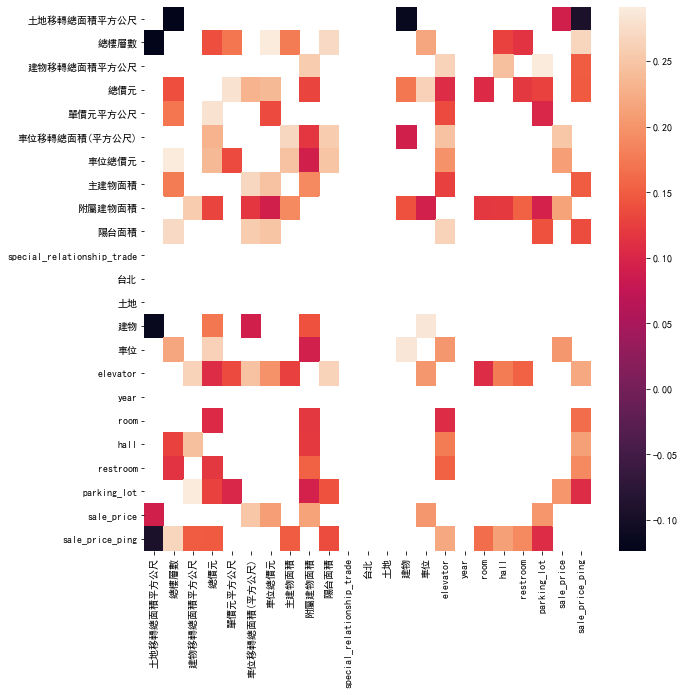

In [31]:
plt.figure(figsize=(10,10))
mask = ((abs(df.corr())<0.09)|(abs(df.corr())>=0.3))
sns.heatmap(df.corr(),mask = mask)

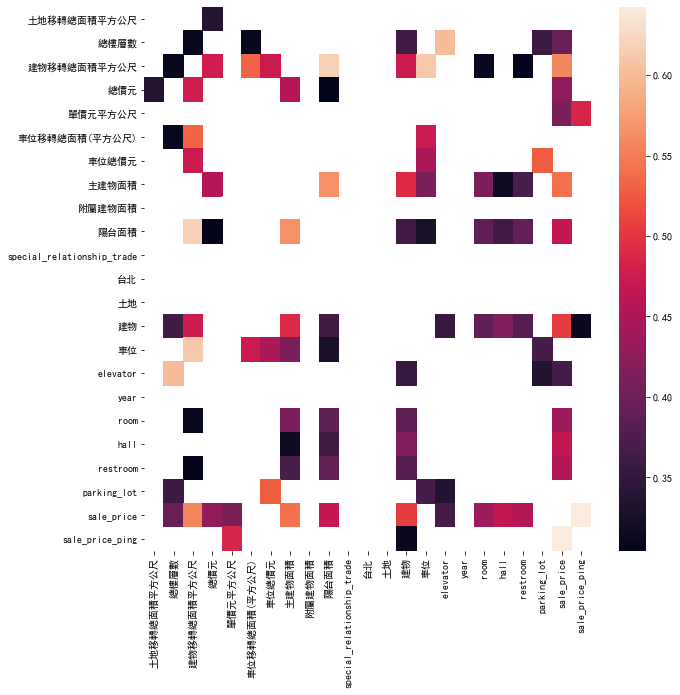

In [32]:
plt.figure(figsize=(10,10))
mask = (abs(df.corr())<0.3)|(abs(df.corr())>=0.7)
sns.heatmap(df.corr(),mask = mask)

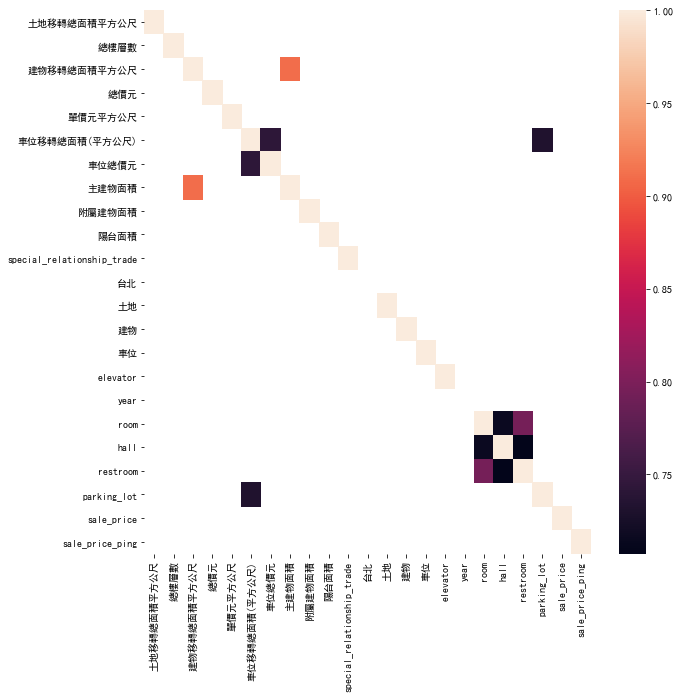

In [33]:
plt.figure(figsize=(10,10))
mask = abs(df.corr())<0.7
sns.heatmap(df.corr(),mask = mask)

In [34]:
cats = pd.qcut(df['sale_price'],5)
cats.value_counts()

(6.799, 7.097]     1651
(-0.001, 6.799]    1646
(7.262, 7.474]     1645
(7.474, 9.433]     1642
(7.097, 7.262]     1642
Name: sale_price, dtype: int64

In [35]:
cats = pd.qcut(df['sale_price_ping'],5)
cats.value_counts()

(5.895, 6.842]     1563
(5.8, 5.895]       1563
(5.588, 5.711]     1563
(-0.001, 5.588]    1563
(5.711, 5.8]       1562
Name: sale_price_ping, dtype: int64

In [36]:
cats = pd.cut(df['sale_price'],5)
cats.value_counts()

(5.66, 7.546]        6705
(7.546, 9.433]       1231
(3.773, 5.66]         276
(1.887, 3.773]         13
(-0.00943, 1.887]       1
Name: sale_price, dtype: int64

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


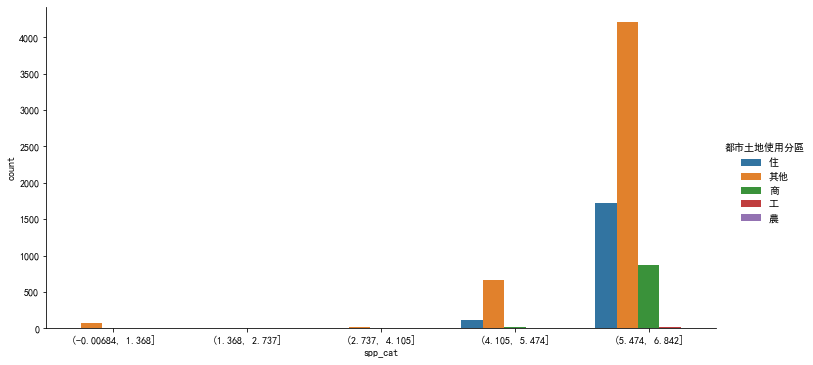

In [40]:
temp = df[['都市土地使用分區','sale_price_ping']]
temp['spp_cat'] =  pd.cut(df['sale_price_ping'],5)
temp = temp.groupby('都市土地使用分區')['spp_cat'].value_counts()
temp = temp.rename('count').reset_index()
sns.catplot(x='spp_cat',y='count',kind='bar',data=temp,height=5, aspect=2,hue='都市土地使用分區')

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


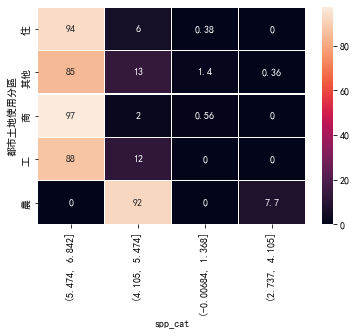

In [41]:
temp = df[['都市土地使用分區','sale_price_ping']]
temp['spp_cat'] =  pd.cut(df['sale_price_ping'],5)
temp = temp.groupby('都市土地使用分區')['spp_cat'].value_counts(normalize=True)
temp = temp.rename('total').reset_index()
temp['total']=temp['total'].mul(100)
temp = temp.pivot('都市土地使用分區','spp_cat','total')
temp = temp.fillna(0)
sns.heatmap(data=temp,linewidths=.1,annot=True)